In [354]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt 
import PIL.Image
%matplotlib inline

In [355]:
# %load data.py
data_array = [ [ 67, 51, 73, 90, 5, 25, 0, 62, 50], [ 67, 6, 85, 20, 28, 25, 80, 21, 66], [ 60, 58, 70, 90, 34, 50, 60, 24, 75], [ 39, 63, 76, 50, 42, 75, 30, 30, 75], [ 40, 84, 63, 50, 29, 50, 100, 32, 50], [ 72, 100, 94, 30, 5, 50, 82, 19, 50], [ 76, 10, 33, 40, 32, 50, 51, 38, 10], [ 53, 77, 87, 100, 15, 25, 80, 26, 33], [ 73, 31, 16, 90, 33, 10, 20, 23, 33], [ 78, 33, 74, 80, 31, 25, 30, 50, 50], [ 72, 99, 100, 50, 50, 25, 51, 75, 50], [ 34, 56, 93, 50, 24, 25, 20, 68, 50], [ 79, 23, 81, 80, 34, 50, 19, 26, 10], [ 62, 53, 84, 0, 36, 25, 30, 25, 85], [ 51, 82, 96, 30, 43, 25, 32, 34, 80], [ 35, 51, 1, 50, 75, 25, 50, 40, 50], [ 35, 60, 79, 20, 46, 50, 50, 8, 90], [ 77, 94, 82, 70, 30, 25, 100, 1, 50], [ 54, 73, 93, 50, 55, 75, 30, 13, 50], [ 74, 99, 82, 30, 14, 60, 50, 58, 50], [ 61, 2, 0, 50, 46, 10, 50, 5, 50], [ 30, 71, 62, 0, 25, 75, 71, 17, 50], [ 70, 61, 96, 50, 17, 25, 50, 50, 40], [ 81, 59, 100, 75, 15, 50, 50, 51, 50], [ 51, 97, 74, 29, 39, 50, 51, 64, 50], [ 28, 100, 83, 50, 50, 75, 100, 35, 50], [ 60, 58, 90, 60, 25, 25, 100, 72, 50], [ 58, 41, 85, 30, 23, 50, 40, 71, 25], [ 55, 72, 99, 10, 38, 75, 51, 41, 30], [ 54, 55, 89, 20, 24, 65, 20, 32, 50]]
times_array = [ [ 5.036, 7.496, 10.307, 12.378, 5.742, 54.64, 38.667, 22.86, 260.429], [ 2.082, 9.218, 12.78, 8.892, 6.679, 19.73, 4.298, 12.116, 75.811], [ 24.08, 8.081, 7.967, 18.184, 7.921, 13.611, 2.012, 2.604, 107.212], [ 2.402, 4.267, 7.839, 37.533, 4.813, 29.761, 1.521, 7.234, 109.793], [ 8.572, 6.047, 11.42, 9.806, 10.949, 13.024, 2.794, 25.108, 118.172], [ 1.961, 7.813, 9.194, 9.784, 7.807, 17.112, 4.033, 2.021, 52.129], [ 2.355, 6.421, 23.63, 11.637, 12.723, 9.185, 16.955, 4.755, 127.978], [ 1.73, 7.69, 11.633, 17.552, 10.1, 32.506, 4.721, 8.398, 94.821], [ 2.45, 6.228, 9.519, 24.288, 7.869, 16.718, 5.303, 23.71, 283.695], [ 1.967, 8.358, 13.017, 12.246, 11.551, 17.465, 2.118, 9.724, 60.525], [ 2.027, 6.926, 5.452, 8.371, 10.669, 46.073, 47.275, 2.411, 258.04], [ 1.925, 5.089, 7.55, 14.199, 16.819, 12.14, 4.883, 2.745, 39.006], [ 1.782, 10.65, 5.707, 15.05, 5.382, 19.983, 2.3, 2.709, 80.055], [ 2.589, 4.583, 20.59, 10.306, 5.453, 52.393, 6.541, 5.586, 103.101], [ 3.045, 9.692, 9.539, 78.329, 7.308, 41.019, 1.703, 4.232, 58.756], [ 2.456, 9.23, 10.625, 7.97, 27.98, 55.207, 2.12, 89.647, 115.339], [ 1.483, 6.236, 10.255, 9.512, 3.557, 19.581, 2.23, 17.01, 74.008], [ 2.177, 5.686, 4.501, 21.202, 6.259, 9.545, 4.109, 19.469, 65.455], [ 2.582, 6.446, 21.273, 15.829, 6.062, 59.582, 19.921, 1.818, 69.401], [ 2.903, 7.416, 9.927, 5.927, 3.712, 23.79, 3.966, 11.526, 60.971], [ 1.926, 20.815, 5.088, 6.366, 5.945, 34.878, 4.461, 9.04, 62.026], [ 1.615, 9.603, 9.853, 13.073, 16.409, 14.035, 1.572, 54.876, 250.326], [ 1.798, 11.502, 7.936, 42.015, 7.297, 19.71, 1.972, 5.266, 113.245], [ 1.756, 14.529, 10.155, 8.26, 4.271, 22.316, 1.794, 2.739, 152.648], [ 2.594, 8.524, 10.651, 8.611, 6.583, 45.647, 3.438, 4.722, 49.767], [ 1.603, 5.982, 14.741, 4.901, 5.732, 15.053, 1.695, 6.398, 24.313], [ 2.909, 3.173, 11.294, 11.1, 54.051, 49.664, 6.06, 2.769, 80.878], [ 1.586, 10.707, 9.737, 22.357, 6.335, 51.826, 1.904, 2.353, 124.962], [ 2.411, 3.007, 6.373, 12.878, 5.445, 55.844, 2.569, 6.989, 61.566], [ 1.846, 5.933, 5.988, 8.79, 27.659, 127.882, 2.405, 6.827, 58.26]]
catches = [ [ 83, 76, 100, 0, 37, 0, 50, 52, 0], [ 73, 58, 100, 0, 31, 0, 20, 21, 0]]
interleaved = [ [ (1, 0, 0), (2, 1, 1), (3, 7, 0), (4, 4, 0), (5, 2, 1), (6, 3, 0), (7, 3, 1), (8, 1, 1), (9, 4, 1), (10, 2, 0), (11, 6, 1), (12, 4, 0), (13, 1, 1), (14, 3, 1), (15, 1, 1), (16, 2, 1), (17, 1, 0), (18, 3, 1), (19, 2, 1), (20, 7, 1), (21, 7, 0), (22, 0, 0), (23, 2, 0), (24, 7, 1), (25, 5, 0), (26, 4, 1), (27, 5, 1), (28, 1, 0), (29, 7, 1), (30, 1, 1)], [ (1, 3, 0), (2, 0, 1), (3, 3, 1), (4, 1, 0), (5, 3, 1), (6, 2, 1), (7, 3, 0), (8, 5, 1), (9, 1, 0), (10, 1, 0), (11, 5, 1), (12, 2, 0), (13, 1, 1), (14, 0, 1), (15, 7, 0), (16, 5, 0), (17, 1, 0), (18, 0, 1), (19, 5, 1), (20, 1, 1), (21, 1, 1), (22, 4, 1), (23, 6, 0), (24, 1, 1), (25, 5, 0), (26, 0, 1), (27, 4, 1), (28, 7, 0), (29, 7, 0), (30, 1, 0)], [ (1, 0, 1), (2, 6, 0), (3, 1, 0), (4, 3, 0), (5, 5, 1), (6, 2, 1), (7, 3, 1), (8, 5, 0), (9, 6, 1), (10, 2, 1), (11, 0, 0), (12, 0, 1), (13, 2, 1), (14, 2, 0), (15, 4, 0), (16, 5, 0), (17, 7, 0), (18, 2, 1), (19, 6, 1), (20, 5, 0), (21, 0, 1), (22, 2, 0), (23, 0, 1), (24, 1, 0), (25, 5, 1), (26, 5, 0), (27, 2, 0), (28, 0, 1), (29, 7, 1), (30, 7, 0)], [ (1, 6, 1), (2, 1, 0), (3, 2, 0), (4, 0, 0), (5, 2, 1), (6, 6, 1), (7, 5, 0), (8, 6, 1), (9, 0, 1), (10, 3, 0), (11, 0, 0), (12, 6, 1), (13, 5, 1), (14, 3, 0), (15, 5, 0), (16, 0, 1), (17, 6, 0), (18, 3, 1), (19, 7, 1), (20, 5, 1), (21, 5, 0), (22, 3, 0), (23, 4, 0), (24, 6, 1), (25, 0, 1), (26, 3, 1), (27, 1, 1), (28, 7, 0), (29, 6, 1), (30, 5, 1)], [ (1, 0, 1), (2, 0, 1), (3, 5, 0), (4, 7, 0), (5, 4, 0), (6, 7, 1), (7, 2, 0), (8, 3, 0), (9, 5, 0), (10, 0, 0), (11, 0, 0), (12, 5, 0), (13, 0, 1), (14, 6, 0), (15, 1, 1), (16, 2, 1), (17, 6, 0), (18, 4, 0), (19, 0, 0), (20, 0, 0), (21, 4, 1), (22, 0, 1), (23, 7, 0), (24, 5, 0), (25, 6, 1), (26, 7, 0), (27, 0, 1), (28, 2, 1), (29, 2, 0), (30, 6, 0)], [ (1, 1, 1), (2, 7, 1), (3, 6, 0), (4, 3, 1), (5, 3, 1), (6, 0, 1), (7, 6, 1), (8, 5, 0), (9, 3, 0), (10, 6, 1), (11, 1, 1), (12, 4, 1), (13, 2, 1), (14, 4, 1), (15, 7, 0), (16, 2, 0), (17, 4, 0), (18, 2, 1), (19, 1, 0), (20, 2, 1), (21, 2, 1), (22, 0, 1), (23, 0, 1), (24, 4, 0), (25, 1, 1), (26, 1, 1), (27, 6, 0), (28, 2, 1), (29, 2, 1), (30, 7, 1)], [ (1, 6, 1), (2, 7, 0), (3, 3, 0), (4, 6, 0), (5, 5, 0), (6, 5, 0), (7, 4, 1), (8, 7, 1), (9, 4, 1), (10, 5, 1), (11, 7, 0), (12, 7, 0), (13, 7, 1), (14, 1, 0), (15, 4, 1), (16, 2, 1), (17, 5, 1), (18, 6, 1), (19, 6, 1), (20, 4, 0), (21, 7, 0), (22, 1, 0), (23, 3, 1), (24, 2, 1), (25, 2, 0), (26, 7, 0), (27, 1, 1), (28, 3, 1), (29, 3, 0), (30, 5, 1)], [ (1, 1, 1), (2, 1, 0), (3, 7, 1), (4, 2, 0), (5, 6, 0), (6, 1, 1), (7, 3, 0), (8, 7, 1), (9, 4, 1), (10, 2, 0), (11, 1, 1), (12, 1, 1), (13, 7, 1), (14, 2, 1), (15, 7, 0), (16, 1, 0), (17, 3, 1), (18, 5, 0), (19, 5, 1), (20, 2, 1), (21, 7, 0), (22, 0, 0), (23, 7, 0), (24, 1, 1), (25, 5, 1), (26, 6, 0), (27, 7, 1), (28, 3, 1), (29, 3, 0), (30, 2, 1)], [ (1, 6, 1), (2, 5, 1), (3, 4, 0), (4, 2, 0), (5, 6, 1), (6, 5, 0), (7, 6, 1), (8, 5, 0), (9, 4, 0), (10, 6, 0), (11, 6, 1), (12, 3, 0), (13, 4, 1), (14, 0, 0), (15, 6, 1), (16, 2, 1), (17, 4, 0), (18, 6, 0), (19, 5, 0), (20, 2, 0), (21, 3, 1), (22, 5, 0), (23, 0, 0), (24, 5, 0), (25, 3, 1), (26, 7, 1), (27, 0, 0), (28, 5, 0), (29, 1, 0), (30, 6, 1)]]
num_participants = 9
num_enteries = 30

class data:
    def __init__(self, data_array, times_array, catches_array, interleaved_array, num_participants, num_enteries):
        self.data_array = data_array
        self.times = times_array
        self.catches = catches_array
        self.interleaved = interleaved_array
        self.num_part = num_participants
        self.num_ent = num_enteries

info = data(data_array, times_array, catches, interleaved, num_participants, num_enteries)

In [356]:
# %load pond_array.py
pond_array = [[["rot_thinrec1", "rot_thinrec2"], [7]],
[["zigzag1", "zigzag2"], [22]],
[["dualDiamonds1", "dualDiamonds2"], [28]],
[["rot_widerec1", "rot_widerec2"], [8]],
[["upsidedown_L1", "upsidedown_L2"], [9]],
[["croissant1", "croissant2"], [13]],
[["set1_rotY1", "set1_rotY2"], [29]],
[["set2_rotY1", "set2_rotY2"], [15]],
[["set1_rotarrow1", "set1_rotarrow2"], [23]],
[["set2_rotarrow1", "set2_rotarrow2"], [24]],
[["T2", "T1"], [1]],
[["sideways_T1", "sideways_T2"], [16]],
[["sideways_L1", "sideways_L2"], [2]],
[["upwardpointing_L", "downwardpointing_L"], [17]],
[["n1", "n2"], [3]],
[["sideways_n1", "sideways_n2"], [19]],
[["trapezoid2", "trapezoid1"],[4]],
[["sideways_trap1", "sideways_trap2"], [18]],
[["upright_croissant", "downward_croissant"], [30]],
[["sideways_croissant1", "sideways_croissant2"], [14]],
[["thin_rec1", "thin_rec2"], [6]],
[["upright_thinrec1", "upright_thinrec2"], [21]],
[["sideways_H1", "sideways_H2"], [5]],
[["H1", "H2"], [20]],
[["horiz_bowtie1", "horiz_bowtie2"], [10]],
[["upright_bowtie1", "upright_bowtie2"], [25]],
[["donut1", "donut2"], [12, 27]],
[["square1", "square2"], [11, 26]]]

names = ["rot_thinrecs", "zigzags", "Diamonds", "rot_widerecs", "upsidedown_L's", "croissants", "set1_rotY's",
"set2_rotY's", "set1_rotarrows", "set2_rotarrows", "T's", "sideways_T's", "sideways_L's", "vertical_L's",
"n's", "sideways_n's", "trapezoids", "sideways_trap's", "vertical_croissants", "sideways_croissants", "horiz_thin_recs", 
"upright_thin_recs", "sidways_H's", "upright_H's", "horiz_bowties", "upright_bowties", "donuts", "squares"]

# Displaying Data

In [357]:
def display_boxplots():
    result = []
    for i in xrange(num_enteries-2):
        result.append([])
    for j in xrange(6): # the non-50's
        for k in xrange(num_participants):
            for l in xrange(len(pond_array[j][1])):
                index = pond_array[j][1][l]-1
                opposite = (j == 1 or j == 4)
                query = info.interleaved[k][index][1]
                vall = info.interleaved[k][index][2]
                value = info.data_array[index][k]
                if (query == 0 or query == 3 or query == 4 or query == 7) and vall == 0:
                    if not opposite:
                        result[j].append(value)
                    else:
                        result[j].append(100-value)
                elif (query == 0 or query == 3 or query == 4 or query == 7) and vall == 1:
                    if not opposite:
                        result[j].append(100-value)
                    else:
                        result[j].append(value)
                elif vall == 0:
                    if not opposite:
                        result[j].append(100-value)
                    else:
                        result[j].append(value)
                else:
                    if not opposite:
                        result[j].append(value)
                    else:
                        result[j].append(100-value)
    for m in xrange(6, 10): # 0 axes of symmetry
        for p in xrange(num_participants):
            for b in xrange(len(pond_array[m][1])):
                index = pond_array[m][1][b]-1
                query = info.interleaved[p][index][1]
                vall = info.interleaved[p][index][2]
                value = info.data_array[index][p]
                if (query == 0 or query == 3 or query == 4 or query == 7):
                    result[m].append(value)
                else:
                    result[m].append(100-value)
    for n in xrange(10, 20): # 1 axis of symmetry
        for d in xrange(num_participants):
            for c in xrange(len(pond_array[n][1])):
                index = pond_array[n][1][c]-1
                query = info.interleaved[d][index][1]
                vall = info.interleaved[d][index][2]
                value = info.data_array[index][d]
                if (query == 0 or query == 3 or query == 4 or query == 7):
                    result[n].append(value)
                else:
                    result[n].append(100-value)
    for e in xrange(20, 28): # 2 axes of symmetry
        for f in xrange(num_participants):
            for t in xrange(len(pond_array[e][1])):
                index = pond_array[e][1][t]-1
                query = info.interleaved[f][index][1]
                vall = info.interleaved[f][index][2]
                value = info.data_array[index][f]
                result[e].append(value)
    plt.rcParams['figure.figsize'] = (6.0, 5.0)
    plt.figure()
    plt.boxplot(result)
    plt.title("Boxplot Distributions of \nResponses by Pond Type\n")
    plt.xticks(range(1, (num_enteries-2)+1), names)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = -80)
    plt.ylim(0, 100)
    plt.show()
        

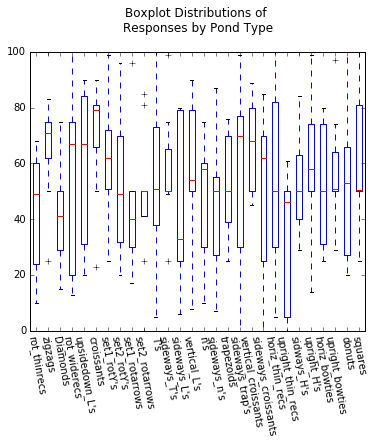

In [358]:
display_boxplots()

# Displaying Reaction Times (RT = last click - page open) 

In [359]:
def display_times():
    result = []
    for p in xrange(num_enteries-2):
        result.append([])
    for i in xrange(num_enteries-2):
        for j in xrange(len(pond_array[i][1])):
            index = pond_array[i][1][j]-1
            result[i] += info.times[index]
    plt.rcParams['figure.figsize'] = (6.0, 5.0)
    plt.figure()
    plt.boxplot(result)
    plt.title("Boxplot Distributions of \nResponse Times by Pond Type\n")
    plt.xticks(range(1, (num_enteries-2)+1), names)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = -80)
    plt.ylim(0, 100)
    plt.show()

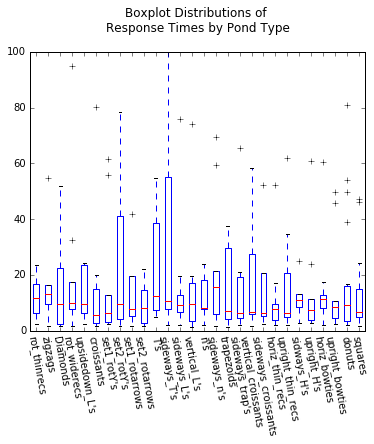

In [360]:
display_times()

# Displaying Box Plots for Catch Ponds

In [361]:
def display_catches():
    result_array = copy.deepcopy(info.catches)
    plt.figure()
    plt.boxplot(result_array)
    plt.title("Boxplot Distributions of \nResponses for Catch Questions\n")
    plt.xticks(range(1, 4), ["catch I", "catch zigzag"])
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = -80)
    plt.ylim(-10, 130)
    plt.show()

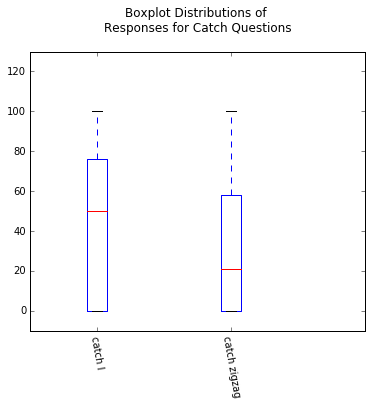

In [362]:
display_catches()